In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
import re
import torch
import torchvision
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
from PIL import Image

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

import torch
import torchvision

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SequentialSampler

from matplotlib import pyplot as plt

import os

In [ ]:
from google.colab import drive
drive.mount('//drive')

Mounted at //drive


In [ ]:

files_list = sorted(os.listdir("/drive/MyDrive/WCEBleedGen/bleeding/Images"))
print(len(files_list))

1309


In [ ]:
print(files_list)

['img- (1).png', 'img- (10).png', 'img- (100).png', 'img- (1000).png', 'img- (1001).png', 'img- (1002).png', 'img- (1003).png', 'img- (1004).png', 'img- (1005).png', 'img- (1006).png', 'img- (1007).png', 'img- (1008).png', 'img- (1009).png', 'img- (101).png', 'img- (1010).png', 'img- (1011).png', 'img- (1012).png', 'img- (1013).png', 'img- (1014).png', 'img- (1015).png', 'img- (1016).png', 'img- (1017).png', 'img- (1018).png', 'img- (1019).png', 'img- (102).png', 'img- (1020).png', 'img- (1021).png', 'img- (1022).png', 'img- (1023).png', 'img- (1024).png', 'img- (1025).png', 'img- (1026).png', 'img- (1027).png', 'img- (1028).png', 'img- (1029).png', 'img- (103).png', 'img- (1030).png', 'img- (1031).png', 'img- (1032).png', 'img- (1033).png', 'img- (1034).png', 'img- (1035).png', 'img- (1036).png', 'img- (1037).png', 'img- (1038).png', 'img- (1039).png', 'img- (104).png', 'img- (1040).png', 'img- (1041).png', 'img- (1042).png', 'img- (1043).png', 'img- (1044).png', 'img- (1045).png', 'i

In [ ]:
files_list = sorted(os.listdir("/drive/MyDrive/WCEBleedGen/bleeding/Bounding boxes/TXT"))
print(len(files_list))

1309


In [ ]:
# labels=[]
# files_list = sorted(os.listdir("/drive/MyDrive/WCEBleedGen/bleeding/Images"))
# for file_name in files_list:
#     path=("/drive/MyDrive/WCEBleedGen/bleeding/Images"+"/"+file_name)
#     labels.append(path)


# labels = np.array(labels)


In [ ]:
# im_labels=[]
# path="/drive/MyDrive/WCEBleedGen/bleeding/Bounding boxes/TXT"
# files_list = sorted(os.listdir("/drive/MyDrive/WCEBleedGen/bleeding/Bounding boxes/TXT"))
# bounding_box=[]
# for a in files_list:
#   f = open(path+"/"+a, "r")

#   s=(f.read())
#   print(s +"a")
#   break

In [ ]:
im_labels=[]
path="/drive/MyDrive/WCEBleedGen/bleeding/Bounding boxes/TXT"
files_list = sorted(os.listdir("/drive/MyDrive/WCEBleedGen/bleeding/Bounding boxes/TXT"))
bounding_box=[]
for a in files_list:
  f = open(path+"/"+a, "r")

  s=(f.read())

  l=[]
  r=0
  k=4

  for i in range(len(s)):
    if(i==len(s)-1):
      l.append(int(s[r:i+1]))
      k=k-1


    if s[i]==" ":
      l.append(int(s[r:i]))
      r=i
      k=k-1
    if(k==0 ):

      bounding_box.append(l)

      im_labels.append(a)
      k=4
      l=[]







In [ ]:
len(bounding_box)

2477

In [ ]:
im_labels[0]

'img- (1).txt'

In [ ]:
xmin=[]
xmax=[]
ymin=[]
ymax=[]
for i in bounding_box:
  xmin.append(i[0])
  ymin.append(i[1])
  xmax.append(i[2])
  ymax.append(i[3])

In [ ]:
width=np.array(xmax)-np.array(xmin)
length=np.array(ymax)-np.array(ymin)

In [ ]:
d={"image_id":im_labels,"bounding box":bounding_box,"xmin":xmin,"ymin":ymin,"width":width,"length":length}

In [ ]:
df=pd.DataFrame(d)

In [ ]:
df

,image_id,bounding box,xmin,ymin,width,length
0,img- (1).txt,"[156, 101, 202, 166]",156,101,46,65
1,img- (10).txt,"[95, 159, 221, 220]",95,159,126,61
2,img- (100).txt,"[50, 90, 150, 162]",50,90,100,72
3,img- (1000).txt,"[27, 0, 71, 75]",27,0,44,75
4,img- (1000).txt,"[160, 71, 208, 120]",160,71,48,49
...,...,...,...,...,...,...
2472,img- (997).txt,"[98, 2, 150, 66]",98,2,52,64
2473,img- (997).txt,"[116, 92, 131, 114]",116,92,15,22
2474,img- (997).txt,"[28, 154, 46, 193]",28,154,18,39
2475,img- (998).txt,"[53, 30, 119, 133]",53,30,66,103


In [ ]:
df.iloc[600,:]

image_id          img- (1254).txt
bounding box    [0, 164, 49, 224]
xmin                            0
ymin                          164
width                          49
length                         60
Name: 600, dtype: object

In [ ]:
df=df. iloc[:1000]

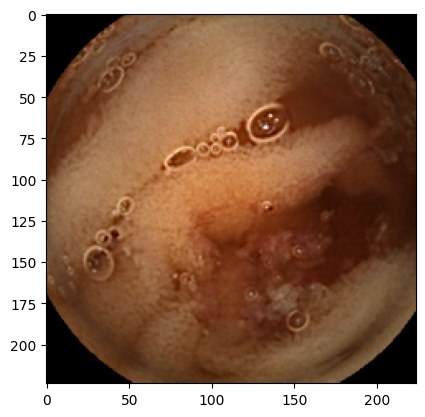

<Figure size 640x480 with 0 Axes>

In [ ]:
p=("/drive/MyDrive/WCEBleedGen/bleeding/Images")
image = plt.imread(p+"/"+im_labels[0][0:-3]+"png")
plt.imshow(image)
fig=plt.figure()

In [ ]:
im_labels[0]

'img- (1).txt'

In [ ]:
bounding_box[0]

[156, 101, 202, 166]

In [ ]:
im_labels[319]

'img- (1120).txt'

tensor([157, 131, 175, 147], dtype=torch.int32)
torch.Size([4])
torch.Size([1, 4])


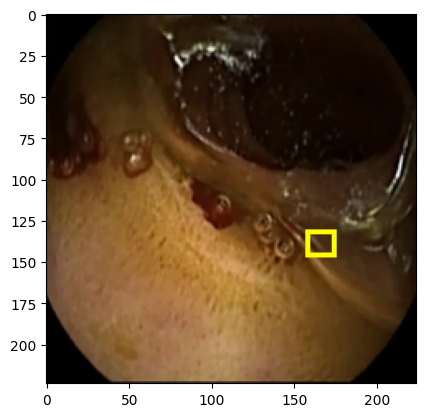

In [ ]:


# read input image
img = read_image(p+"/"+im_labels[320][0:-3]+"png")

# bounding box in (xmin, ymin, xmax, ymax) format
# top-left point=(xmin, ymin), bottom-right point = (xmax, ymax)
bbox = bounding_box[319]
bbox = torch.tensor(bbox, dtype=torch.int)
print(bbox)
print(bbox.size())
bbox = bbox.unsqueeze(0)
print(bbox.size())

# draw bounding box on the input image
img=draw_bounding_boxes(img, bbox, width=3, colors=(255,255,0))

# transform it to PIL image and display
img = torchvision.transforms.ToPILImage()(img)
plt.imshow(img)

# BBOX cleaning

In [ ]:
wt_train=df

In [ ]:
wt_train=wt_train.rename(columns = {'xmin':'x','ymin':'y','width':'w','length':'h'})


In [ ]:

wt_train

,image_id,bounding box,x,y,w,h
0,img- (1).txt,"[156, 101, 202, 166]",156,101,46,65
1,img- (10).txt,"[95, 159, 221, 220]",95,159,126,61
2,img- (100).txt,"[50, 90, 150, 162]",50,90,100,72
3,img- (1000).txt,"[27, 0, 71, 75]",27,0,44,75
4,img- (1000).txt,"[160, 71, 208, 120]",160,71,48,49
...,...,...,...,...,...,...
995,img- (245).txt,"[118, 1, 161, 21]",118,1,43,20
996,img- (245).txt,"[162, 10, 174, 17]",162,10,12,7
997,img- (245).txt,"[177, 18, 222, 52]",177,18,45,34
998,img- (245).txt,"[11, 33, 59, 112]",11,33,48,79


In [ ]:
# import shutil


# image_list = sorted(os.listdir("/drive/MyDrive/WCEBleedGen/bleeding/Images/"))
# testing=image_list[-665:]
# training = image_list[:-665]
# dirs_list = [("/drive/MyDrive/WCEBleedGen/bleeding/Images/", "/drive/MyDrive/WCEBleedGen/bleeding/test/")]

# for img in testing:
#     for source_folder, destination_folder in dirs_list:
#         shutil.copy(source_folder+img, destination_folder+img)

In [ ]:
t = sorted(os.listdir("/drive/MyDrive/WCEBleedGen/bleeding/test/"))
len(t)

665

In [ ]:
image_ids = wt_train['image_id'].unique()
valid_ids = image_ids[-150:]
train_ids = image_ids[:-150]

In [ ]:
len(image_ids)

473

In [ ]:
valid_df = wt_train[wt_train['image_id'].isin(valid_ids)]
train_df = wt_train[wt_train['image_id'].isin(train_ids)]

In [ ]:
valid_df

,image_id,bounding box,x,y,w,h
687,img- (129).txt,"[76, 118, 105, 141]",76,118,29,23
688,img- (1290).txt,"[29, 103, 150, 201]",29,103,121,98
689,img- (1290).txt,"[24, 190, 83, 224]",24,190,59,34
690,img- (1290).txt,"[55, 214, 59, 218]",55,214,4,4
691,img- (1291).txt,"[53, 102, 142, 156]",53,102,89,54
...,...,...,...,...,...,...
995,img- (245).txt,"[118, 1, 161, 21]",118,1,43,20
996,img- (245).txt,"[162, 10, 174, 17]",162,10,12,7
997,img- (245).txt,"[177, 18, 222, 52]",177,18,45,34
998,img- (245).txt,"[11, 33, 59, 112]",11,33,48,79


In [ ]:
valid_df.shape, train_df.shape

((313, 6), (687, 6))

# DATA Retriver

In [ ]:
class Dataset(Dataset):

    def __init__(self, dataframe, image_dir, transforms=None):
        super().__init__()

        self.image_ids =dataframe['image_id'].unique()
        self.df = dataframe
        self.image_dir = image_dir
        self.transforms = transforms

    def __getitem__(self, index: int):

        image_id = self.image_ids[index]

        records = self.df[self.df['image_id'] == image_id]



        image = cv2.imread(f'{self.image_dir}/{image_id[0:-4]}.png', cv2.IMREAD_COLOR)  #reading an image

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)    #changing color space BGR --> RGB
        image /= 255.0

        boxes = records[['x', 'y', 'w', 'h']].to_numpy()
        area = (boxes[:, 3]) * (boxes[:, 2])  #Calculating area of boxes
        boxes[:, 2] = boxes[:, 0] + boxes[:, 2]  #upper coordinate
        boxes[:, 3] = boxes[:, 1] + boxes[:, 3]  #lower coordinate
        area = torch.as_tensor(area, dtype=torch.float32)

        # there is only one class
        labels = torch.ones((records.shape[0],), dtype=torch.int64)

        # suppose all instances are not crowd
        iscrowd = torch.zeros((records.shape[0],), dtype=torch.int64)

        target = {}
        target['boxes'] = boxes
        target['labels'] = labels
        target['image_id'] = torch.tensor([index])
        target['area'] = area
        target['iscrowd'] = iscrowd

        if self.transforms:
            sample = {
                'image': image,
                'bboxes': target['boxes'],
                'labels': labels
            }
            sample = self.transforms(**sample)
            image = sample['image']

            target['boxes'] =  torch.tensor(sample['bboxes']).float()
            return image, target, image_id

    def __len__(self) -> int:
        return self.image_ids.shape[0]

In [ ]:
def get_train_transform():
    return A.Compose(
        [

            A.OneOf([
                A.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit= 0.2,
                                     val_shift_limit=0.2, p=0.9),
                A.RandomBrightnessContrast(brightness_limit=0.2,
                                           contrast_limit=0.2, p=0.9),
            ],p=0.9),
            A.ToGray(p=0.01),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.Resize(height=512, width=512, p=1),
            ToTensorV2(p=1.0),
        ],
        p=1.0,
        bbox_params=A.BboxParams(
            format='pascal_voc',
            min_area=0,
            min_visibility=0,
            label_fields=['labels']
        )
    )


def get_valid_transform():
    return A.Compose(
        [
            A.Resize(height=512, width=512, p=1.0),
            ToTensorV2(p=1.0),
        ],
        p=1.0,
        bbox_params=A.BboxParams(
            format='pascal_voc',
            min_area=0,
            min_visibility=0,
            label_fields=['labels']
        )
    )


# TrainLoader

In [ ]:
def collate_fn(batch):
    return tuple(zip(*batch))

DIR_INPUT = '/drive/MyDrive/WCEBleedGen/bleeding'
DIR_TRAIN =f'{DIR_INPUT}/train'
DIR_TEST = f'{DIR_INPUT}/test'

train_dataset = WheatDataset(train_df, DIR_TRAIN, get_train_transform())
valid_dataset = WheatDataset(valid_df, DIR_TEST, get_valid_transform())

# split the dataset in train and test set
indices = torch.randperm(len(train_dataset)).tolist()

train_data_loader = DataLoader(
    train_dataset,
    batch_size= 16,
    shuffle=False,
    num_workers=4,
    collate_fn=collate_fn
)

valid_data_loader = DataLoader(
    valid_dataset,
    batch_size=16,
    shuffle=False,
    num_workers=4,
    collate_fn=collate_fn
)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# SAMPLE

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
images, targets, image_ids= next(iter(train_data_loader))



In [ ]:
images = list(image.to(device) for image in images)
targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

In [ ]:
boxes = targets[7]['boxes'].cpu().numpy().astype(np.int32)
print(boxes.shape)
sample = images[7].permute(1,2,0).cpu().numpy()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

for box in boxes:
    cv2.rectangle(sample,
                  (box[0], box[1]),
                  (box[2], box[3]),
                  (220, 0, 0), 3)

ax.set_axis_off()
ax.imshow(sample)

# FASTER RCNN

In [ ]:
# load a model; pre-trained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

In [ ]:
num_classes = 2  # 1 class (wt) + background

# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# PRE Calculation

In [ ]:
class Averager:
    def __init__(self):
        self.current_total = 0.0
        self.iterations = 0.0

    def send(self, value):
        self.current_total += value
        self.iterations += 1

    @property
    def value(self):
        if self.iterations == 0:
            return 0
        else:
            return 1.0 * self.current_total / self.iterations

    def reset(self):
        self.current_total = 0.0
        self.iterations = 0.0

In [ ]:
def calculate_iou(gt, pr, form='pascal_voc') -> float:

    if form == 'coco':
        gt = gt.copy()
        pr = pr.copy()

        gt[2] = gt[0] + gt[2]
        gt[3] = gt[1] + gt[3]
        pr[2] = pr[0] + pr[2]
        pr[3] = pr[1] + pr[3]

    # Calculate overlap area
    dx = min(gt[2], pr[2]) - max(gt[0], pr[0]) + 1

    if dx < 0:
        return 0.0
    dy = min(gt[3], pr[3]) - max(gt[1], pr[1]) + 1

    if dy < 0:
        return 0.0

    overlap_area = dx * dy

    # Calculate union area
    union_area = (
            (gt[2] - gt[0] + 1) * (gt[3] - gt[1] + 1) +
            (pr[2] - pr[0] + 1) * (pr[3] - pr[1] + 1) -
            overlap_area
    )

    return overlap_area / union_area

In [ ]:
def find_best_match(gts, pred, pred_idx, threshold = 0.5, form = 'pascal_voc', ious=None) -> int:

    best_match_iou = -np.inf
    best_match_idx = -1
    for gt_idx in range(len(gts)):

        if gts[gt_idx][0] < 0:
            # Already matched GT-box
            continue

        iou = -1 if ious is None else ious[gt_idx][pred_idx]

        if iou < 0:
            iou = calculate_iou(gts[gt_idx], pred, form=form)

            if ious is not None:
                ious[gt_idx][pred_idx] = iou

        if iou < threshold:
            continue

        if iou > best_match_iou:
            best_match_iou = iou
            best_match_idx = gt_idx

    return best_match_idx

In [ ]:

    n = len(preds)
    tp = 0
    fp = 0

    for pred_idx in range(n):

        best_match_gt_idx = find_best_match(gts, preds[pred_idx], pred_idx,
                                            threshold=threshold, form=form, ious=ious)

        if best_match_gt_idx >= 0:
            # True positive: The predicted box matches a gt box with an IoU above the threshold.
            tp += 1
            # Remove the matched GT box
            gts[best_match_gt_idx] = -1
        else:
            # No match
            # False positive: indicates a predicted box had no associated gt box.
            fp += 1

    # False negative: indicates a gt box had no associated predicted box.
    fn = (gts.sum(axis=1) > 0).sum()

    return tp / (tp + fp + fn)

In [ ]:
def calculate_image_precision(gts, preds, thresholds = (0.5, ), form = 'coco') -> float:

    n_threshold = len(thresholds)
    image_precision = 0.0

    ious = np.ones((len(gts), len(preds))) * -1
    # ious = None

    for threshold in thresholds:
        precision_at_threshold = calculate_precision(gts.copy(), preds, threshold=threshold,
                                                     form=form, ious=ious)
        image_precision += precision_at_threshold / n_threshold

    return image_precision

# Model Train AND VALIDATION

In [ ]:

#model.load_state_dict(torch.load('../input/weights/fasterrcnn_resnet50_fpn.pth',map_location=torch.device('cpu')))
model.to(device)
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.001, momentum=0.9, weight_decay=0.0005)
num_epochs = 10


In [ ]:
train_hist = Averager()
t = 1
valid_pred_min = 0.65
for epoch in range(num_epochs):
    train_hist.reset()

    model.train()
    for images, targets, image_ids in train_data_loader:

        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)

        losses = sum(loss for loss in loss_dict.values())
        train_loss = losses.item()

        train_hist.send(train_loss)

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        if t % 50 == 0:
            print(f"Iteration #{t} loss: {train_loss}")

        t += 1


    model.eval()
    validation_image_precisions = []
    iou_thresholds = [x for x in np.arange(0.5, 0.76, 0.05)]
    for images, targets, image_ids in valid_data_loader:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        with torch.no_grad():
            outputs = model(images)




        for i, image in enumerate(images):
            boxes = outputs[i]['boxes'].data.cpu().numpy()
            scores = outputs[i]['scores'].data.cpu().numpy()
            gt_boxes = targets[i]['boxes'].cpu().numpy()
            preds_sorted_idx = np.argsort(scores)[::-1]
            preds_sorted = boxes[preds_sorted_idx]
            image_precision = calculate_image_precision(preds_sorted,
                                                        gt_boxes,
                                                        thresholds=iou_thresholds,
                                                        form='coco')
            validation_image_precisions.append(image_precision)

    valid_prec = np.mean(validation_image_precisions)
    print("Validation IOU: {0:.4f}".format(valid_prec))



    #print training/validation statistics
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch,
        train_loss
    ))

    ## TODO: save the model if validation precision has decreased
    if valid_prec >= valid_pred_min:
        print('Validation precision increased({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_pred_min,
            valid_prec))
        torch.save(model.state_dict(), 'fasterrcnn_resnet50_fpn.pth')
        valid_pred_min = valid_prec



Validation IOU: 0.0501
Epoch: 0 	Training Loss: 0.701457
Validation IOU: 0.0190
Epoch: 1 	Training Loss: 0.517539
Iteration #50 loss: 0.46852344274520874
Validation IOU: 0.0251
Epoch: 2 	Training Loss: 0.571914
Validation IOU: 0.0257
Epoch: 3 	Training Loss: 0.455422
Validation IOU: 0.0315
Epoch: 4 	Training Loss: 0.443087
Iteration #100 loss: 0.3824255168437958
Validation IOU: 0.0380
Epoch: 5 	Training Loss: 0.503242
Validation IOU: 0.0329
Epoch: 6 	Training Loss: 0.376543
Validation IOU: 0.0411
Epoch: 7 	Training Loss: 0.378672
Iteration #150 loss: 0.49072420597076416
Validation IOU: 0.0517
Epoch: 8 	Training Loss: 0.399399
Validation IOU: 0.0644
Epoch: 9 	Training Loss: 0.336523


# Evaluating Model

In [ ]:
model.eval()
images, targets, image_ids = next(iter(valid_data_loader))
images = list(image.to(device) for image in images)
outputs = model(images)


In [ ]:
im[0]

In [ ]:
detection_threshold = 0.4
sample = images[7].permute(1,2,0).cpu().numpy()
boxes = outputs[7]['boxes'].data.cpu().numpy()
scores = outputs[7]['scores'].data.cpu().numpy()

boxes = boxes[scores >= detection_threshold].astype(np.int32)

In [ ]:
scores

array([0.81267834, 0.756779  , 0.44401807, 0.37666097, 0.34831026,
       0.33216366, 0.32829812, 0.30531803, 0.26040402, 0.1366417 ,
       0.11037453, 0.10251486, 0.10011503, 0.08877565, 0.08825487,
       0.07830894, 0.06301461, 0.05966795], dtype=float32)

In [ ]:
boxes


array([[329, 386, 429, 495],
       [206,  51, 361, 287],
       [348, 361, 481, 501]], dtype=int32)

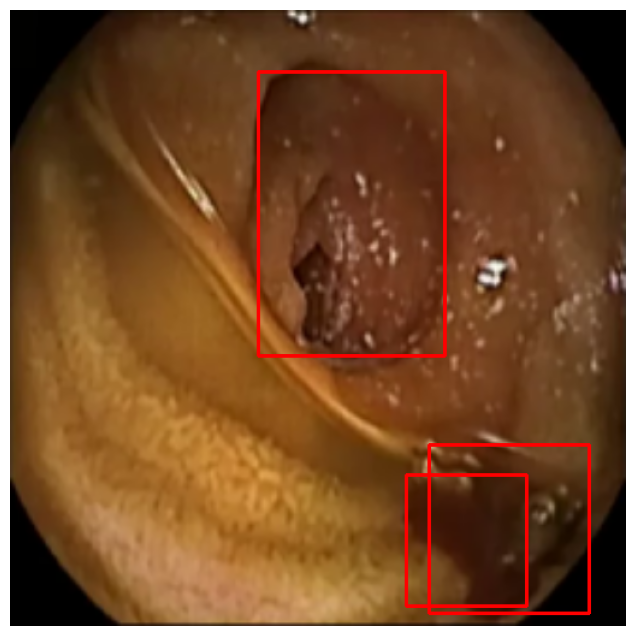

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

for box in boxes:
    cv2.rectangle(sample,
                  (int(box[0]),int( box[1])),
                    (int(box[2]),int(box[3])),
                  (220, 0, 0), 2)

ax.set_axis_off()
ax.imshow(sample)